https://datafai.com/2017/11/04/hierarchical-clustering-with-python/
https://www.quora.com/How-can-I-learn-cluster-analysis-through-R/answer/Ratnakar-Pandey-RP
https://www.analyticsvidhya.com/blog/2016/11/an-introduction-to-clustering-and-different-methods-of-clustering/

In [34]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import warnings
warnings.filterwarnings('ignore')
#Import CSV FIle
import numpy as np
import pandas as pd

In [35]:
df = pd.read_csv("cheese.csv")
df.head()
df.shape
print()

,RETAILER,VOLUME,DISP,PRICE
1,LOS ANGELES - LUCKY,21374,0.162000,2.578460
2,LOS ANGELES - RALPHS,6427,0.124113,3.727867
3,LOS ANGELES - VONS,17302,0.102000,2.711421
4,CHICAGO - DOMINICK,13561,0.027591,2.651206
5,CHICAGO - JEWEL,42774,0.090613,1.986674


(5555, 4)

In [36]:
# Aggregate Information at the store level
df_pivot=pd.pivot_table(df, values = ['VOLUME','DISP','PRICE'], index = 'RETAILER', aggfunc=np.median)
df_pivot.head()
df_pivot.shape

,DISP,PRICE,VOLUME
RETAILER,,,
"ALBANY,NY - PRICE CHOPPER",0.000000,2.864821,717.0
ATLANTA - KROGER CO,0.030872,2.701700,4455.0
ATLANTA - WINN DIXIE,0.000000,2.692330,2848.0
BALTI/WASH - GIANT FOOD INC,0.000000,3.783658,4337.0
BALTI/WASH - SAFEWAY,0.000000,3.987125,3832.0


(88, 3)

In [37]:
#Scale all values between 0 and 1

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
scld = MinMaxScaler(feature_range=(0,1))
arr_scld = scld.fit_transform(df_pivot)
df_scld = pd.DataFrame(arr_scld, columns=df_pivot.columns)
df_scld.head()
np.round(df_scld.describe(),2)
df_scld.shape,2

,DISP,PRICE,VOLUME
0,0.000000,0.318908,0.017176
1,0.073857,0.250296,0.285807
2,0.000000,0.246355,0.170320
3,0.000000,0.705388,0.277327
4,0.000000,0.790969,0.241035


,DISP,PRICE,VOLUME
count,88.00,88.00,88.00
mean,0.20,0.34,0.25
std,0.23,0.21,0.20
min,0.00,0.00,0.00
25%,0.00,0.17,0.11
50%,0.10,0.25,0.22
75%,0.34,0.46,0.33
max,1.00,1.00,1.00


((88, 3), 2)

In [38]:
df_scld.head()
#build clusters
import matplotlib.pyplot as plt
import matplotlib
from scipy.cluster.hierarchy import linkage,dendrogram,fcluster
%matplotlib inline

,DISP,PRICE,VOLUME
0,0.000000,0.318908,0.017176
1,0.073857,0.250296,0.285807
2,0.000000,0.246355,0.170320
3,0.000000,0.705388,0.277327
4,0.000000,0.790969,0.241035


In [39]:
dist = linkage(df_scld,'ward')
type(dist)
dist.shape
dist[0:1]

numpy.ndarray

(87, 4)

array([[5.70000000e+01, 8.50000000e+01, 1.89857462e-02, 2.00000000e+00]])

<Figure size 1080x720 with 0 Axes>

Text(0.5, 1.0, 'Cluster')

Text(0, 0.5, 'Distance')

{'icoord': [[15.0, 15.0, 25.0, 25.0],
  [5.0, 5.0, 20.0, 20.0],
  [45.0, 45.0, 55.0, 55.0],
  [35.0, 35.0, 50.0, 50.0],
  [75.0, 75.0, 85.0, 85.0],
  [65.0, 65.0, 80.0, 80.0],
  [42.5, 42.5, 72.5, 72.5],
  [12.5, 12.5, 57.5, 57.5],
  [95.0, 95.0, 105.0, 105.0],
  [135.0, 135.0, 145.0, 145.0],
  [125.0, 125.0, 140.0, 140.0],
  [115.0, 115.0, 132.5, 132.5],
  [100.0, 100.0, 123.75, 123.75],
  [175.0, 175.0, 185.0, 185.0],
  [165.0, 165.0, 180.0, 180.0],
  [155.0, 155.0, 172.5, 172.5],
  [111.875, 111.875, 163.75, 163.75],
  [205.0, 205.0, 215.0, 215.0],
  [195.0, 195.0, 210.0, 210.0],
  [235.0, 235.0, 245.0, 245.0],
  [225.0, 225.0, 240.0, 240.0],
  [202.5, 202.5, 232.5, 232.5],
  [137.8125, 137.8125, 217.5, 217.5],
  [35.0, 35.0, 177.65625, 177.65625],
  [265.0, 265.0, 275.0, 275.0],
  [255.0, 255.0, 270.0, 270.0],
  [305.0, 305.0, 315.0, 315.0],
  [295.0, 295.0, 310.0, 310.0],
  [285.0, 285.0, 302.5, 302.5],
  [335.0, 335.0, 345.0, 345.0],
  [325.0, 325.0, 340.0, 340.0],
  [293.75, 293

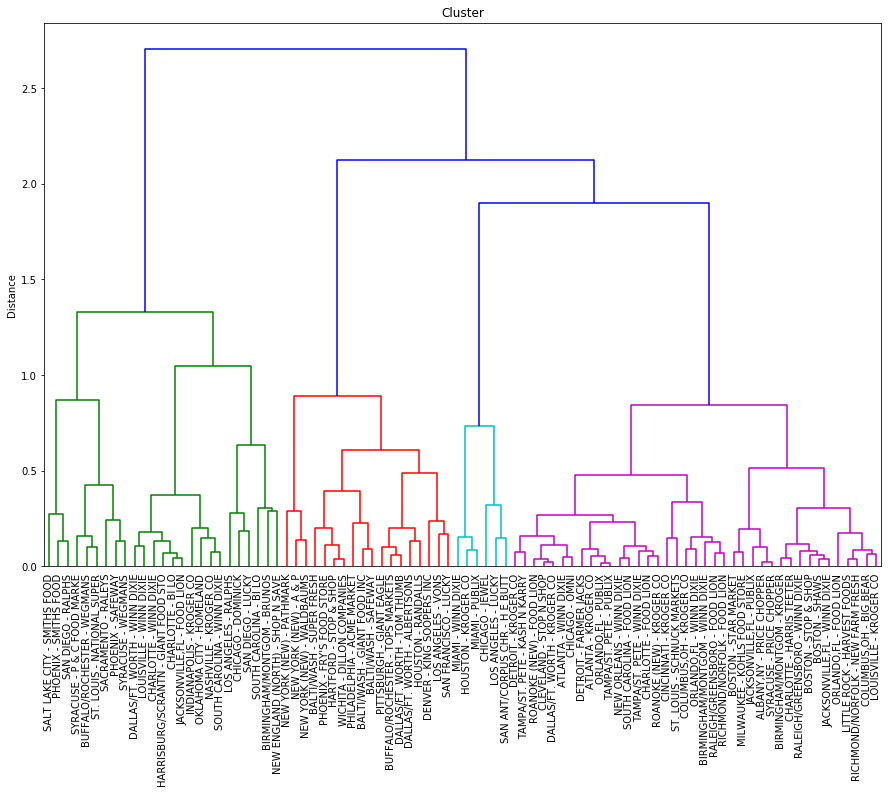

In [40]:
# Find out the right number of clusters
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
plt.title('Cluster')
plt.ylabel('Distance')
dendrogram(dist,labels=df_pivot.index,leaf_font_size= 10, leaf_rotation= 90)
plt.show()

In [41]:
lbl=fcluster(dist,2,criterion='distance')
type(lbl)
print(lbl)

numpy.ndarray

[3 3 3 2 2 2 1 3 3 3 3 3 2 1 1 3 3 1 1 3 3 3 3 3 3 2 3 2 1 2 3 3 1 2 3 2 1
 1 3 3 3 3 1 2 3 1 3 3 3 1 1 3 2 2 2 1 3 3 3 2 2 1 1 2 3 3 3 3 3 3 1 1 3 1
 1 2 1 3 1 1 3 1 3 1 3 3 3 2]


In [46]:
df_pivot.reset_index(level=0,inplace=True)
df_pivot['Cluster']=lbl

In [47]:
df_pivot.head()
df_pivot.tail()
df_pivot.shape

,index,RETAILER,DISP,PRICE,VOLUME,Cluster
0,0,"ALBANY,NY - PRICE CHOPPER",0.000000,2.864821,717.0,3
1,1,ATLANTA - KROGER CO,0.030872,2.701700,4455.0,3
2,2,ATLANTA - WINN DIXIE,0.000000,2.692330,2848.0,3
3,3,BALTI/WASH - GIANT FOOD INC,0.000000,3.783658,4337.0,2
4,4,BALTI/WASH - SAFEWAY,0.000000,3.987125,3832.0,2


,index,RETAILER,DISP,PRICE,VOLUME,Cluster
83,83,SYRACUSE - WEGMANS,0.227423,3.459383,807.0,1
84,84,TAMPA/ST. PETE - KASH N KARRY,0.000000,2.877614,3797.0,3
85,85,TAMPA/ST. PETE - PUBLIX,0.036500,2.769338,5021.0,3
86,86,TAMPA/ST. PETE - WINN DIXIE,0.014416,2.599700,5169.0,3
87,87,WICHITA - DILLON COMPANIES,0.000000,3.378888,1187.5,2


(88, 6)

In [48]:
clust_profile=pd.pivot_table(df_pivot,values=['VOLUME','DISP','PRICE'],index='Cluster',aggfunc=np.mean)
np.round(clust_profile,2)

,DISP,PRICE,VOLUME
Cluster,,,
1,0.22,2.82,3371.52
2,0.04,3.64,3431.00
3,0.03,2.66,4550.66
